# Face Recognition with CNN (using Dlib)

- In this section, we will use Convolutional Neural Network(CNN) to perform face recognition.
- It is much more accurate than LBPH algorithms, but slower.

## 1. Google Drive Mount & Image Datasets Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

yalefaces_path = '/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Datasets/yalefaces.zip'

zip = zipfile.ZipFile(file=yalefaces_path, mode='r')
zip.extractall('./')  # extract all file in current directory
zip.close()

- The Yale Face Database (size 6.4MB) contains 165 grayscale images in GIF format of 15 individuals. 
- There are 11 images per subject, one per different facial expression or configuration: center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.

In [ ]:
import os

train_image_path = '/content/yalefaces/train'

# print all train image file name
all_train_image_file_name = os.listdir(train_image_path)
print(all_train_image_file_name)

['subject15.leftlight.gif', 'subject10.leftlight.gif', 'subject05.happy.gif', 'subject08.happy.gif', 'subject09.centerlight.gif', 'subject07.centerlight.gif', 'subject07.surprised.gif', 'subject08.wink.gif', 'subject09.sleepy.gif', 'subject14.centerlight.gif', 'subject14.leftlight.gif', 'subject03.sleepy.gif', 'subject11.sleepy.gif', 'subject15.normal.gif', 'subject06.rightlight.gif', 'subject01.rightlight.gif', 'subject04.glasses.gif', 'subject05.glasses.gif', 'subject12.happy.gif', 'subject03.noglasses.gif', 'subject05.sad.gif', 'subject11.rightlight.gif', 'subject12.surprised.gif', 'subject09.happy.gif', 'subject08.centerlight.gif', 'subject11.surprised.gif', 'subject01.glasses.gif', 'subject05.noglasses.gif', 'subject14.sleepy.gif', 'subject15.noglasses.gif', 'subject09.normal.gif', 'subject10.sleepy.gif', 'subject01.leftlight.gif', 'subject13.glasses.gif', 'subject05.wink.gif', 'subject14.wink.gif', 'subject11.normal.gif', 'subject12.leftlight.gif', 'subject08.noglasses.gif', 'sub

In [ ]:
all_train_image_paths = [os.path.join(train_image_path, f) for f in all_train_image_file_name]
print(all_train_image_paths)

['/content/yalefaces/train/subject15.leftlight.gif', '/content/yalefaces/train/subject10.leftlight.gif', '/content/yalefaces/train/subject05.happy.gif', '/content/yalefaces/train/subject08.happy.gif', '/content/yalefaces/train/subject09.centerlight.gif', '/content/yalefaces/train/subject07.centerlight.gif', '/content/yalefaces/train/subject07.surprised.gif', '/content/yalefaces/train/subject08.wink.gif', '/content/yalefaces/train/subject09.sleepy.gif', '/content/yalefaces/train/subject14.centerlight.gif', '/content/yalefaces/train/subject14.leftlight.gif', '/content/yalefaces/train/subject03.sleepy.gif', '/content/yalefaces/train/subject11.sleepy.gif', '/content/yalefaces/train/subject15.normal.gif', '/content/yalefaces/train/subject06.rightlight.gif', '/content/yalefaces/train/subject01.rightlight.gif', '/content/yalefaces/train/subject04.glasses.gif', '/content/yalefaces/train/subject05.glasses.gif', '/content/yalefaces/train/subject12.happy.gif', '/content/yalefaces/train/subject03.

## 2. Pre-process the Images

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
os.path.split(all_train_image_paths[0])

('/content/yalefaces/train', 'subject15.leftlight.gif')

In [ ]:
import numpy as np
from PIL import Image

def fetch_preprocessed_image_data(image_paths):
    face_images = []
    ids_of_image = []

    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # convert to grayscale
        image_np = np.array(image, 'uint8')  # convert the image type to a numpy array type (with integer format)
        image_file_name = os.path.split(image_path)[1]
        id_of_image = int(image_file_name.split('.')[0].replace('subject', ''))
        ids_of_image.append(id_of_image)
        face_images.append(image_np)

    return np.array(ids_of_image), face_images

In [ ]:
ids_of_train_image, faces_of_train_image = fetch_preprocessed_image_data(all_train_image_paths)

In [ ]:
ids_of_train_image

array([15, 10,  5,  8,  9,  7,  7,  8,  9, 14, 14,  3, 11, 15,  6,  1,  4,
        5, 12,  3,  5, 11, 12,  9,  8, 11,  1,  5, 14, 15,  9, 10,  1, 13,
        5, 14, 11, 12,  8,  1,  3, 13, 12, 13,  3,  1, 13,  3, 10, 14,  1,
       11, 14,  7, 15,  8,  7,  3, 15, 10, 13,  2,  5,  6,  2,  6, 12,  3,
        7, 13,  4,  7,  9, 10, 12,  2,  7,  4,  8, 12,  9,  6, 15, 15,  8,
       12, 10,  6,  2, 10,  3,  6,  5,  7,  2,  9, 15,  5,  8,  1,  2, 15,
       13, 14, 12, 13,  4,  1, 10,  2, 11,  1,  8,  9,  4,  7, 10,  4,  6,
       11,  6,  5,  9,  6, 14, 13, 14,  4,  3, 11,  4,  2,  2, 11,  4])

In [ ]:
faces_of_train_image[0]

array([[108, 116, 117, ..., 156, 147, 167],
       [237, 248, 244, ..., 163, 152, 171],
       [236, 243, 228, ..., 158, 157, 175],
       ...,
       [231, 223, 222, ..., 130, 123, 123],
       [241, 227, 230, ..., 124, 114, 122],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
faces_of_train_image[0].shape

(243, 320)

In [ ]:
len(ids_of_train_image), len(faces_of_train_image)

(135, 135)

## 3. Detect Facial Points (with sample data)

In [ ]:
import dlib

face_detector = dlib.get_frontal_face_detector()

# A predictor that detect faces based on 68 key features of faces
points_68_detector = dlib.shape_predictor('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/shape_predictor_68_face_landmarks.dat')

# A predictor that detect faces based on only 5 key features of faces
points_5_detector = dlib.shape_predictor('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/shape_predictor_5_face_landmarks.dat')

- `points_68_detector` which finds 68 features in the face then detects the face, is slower than `points_5_detector` which detects the face based on 5 features, but has better performance.
- `points_5_detector` is sometimes used when it needs to be fast like a mobile application.

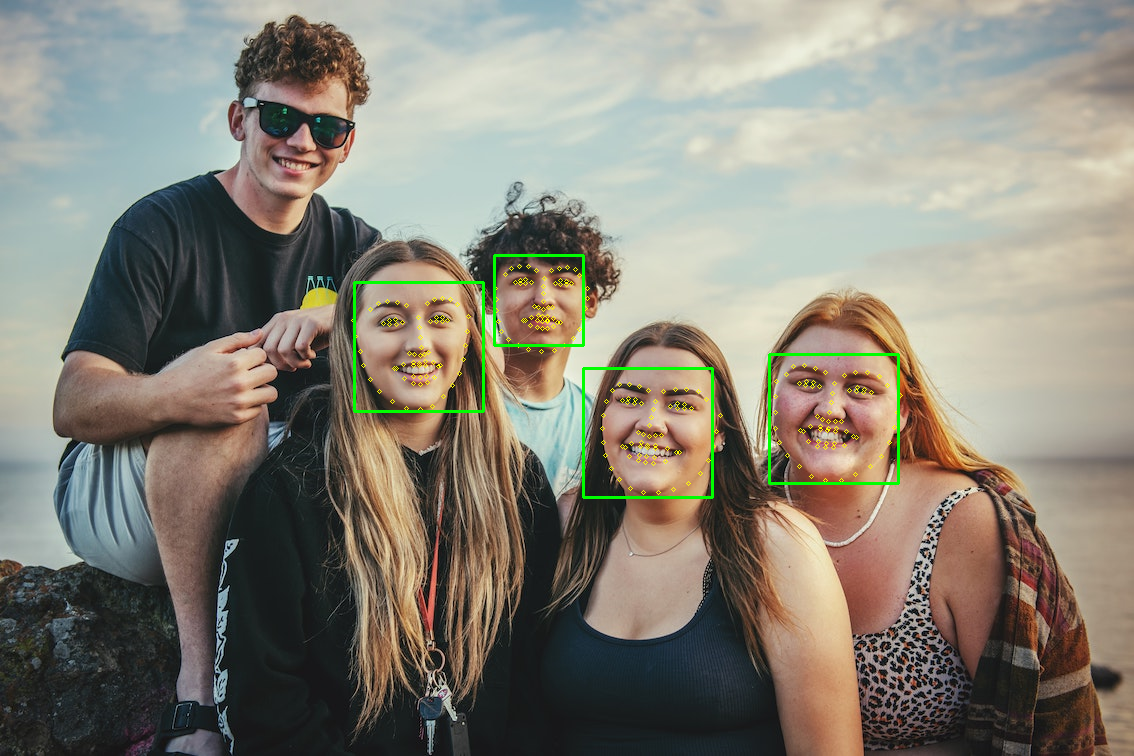

In [ ]:
image = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people.jpg')

face_detections = face_detector(image, 1)

for face_detection in face_detections:
    face_points = points_68_detector(image, face_detection)
    for face_point in face_points.parts():
        cv2.circle(image, (face_point.x, face_point.y), 2, (0, 255, 255))
        left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

cv2_imshow(image)

- face_points.parts() = points[(353, 320), (355, 336), (360, 351), (363, 365), (370, 379), (379, 391), (392, 401), (406, 408), (420, 409), (432, 406), (443, 396), (452, 385), (459, 373), (463, 359), (465, 345), (467, 331), (468, 316), (370, 309), (378, 303), (387, 301), (397, 302), (406, 305), (427, 303), (434, 299), (442, 298), (450, 299), (457, 304), (418, 317), (419, 327), (420, 337), (421, 347), (409, 353), (414, 354), (420, 355), (424, 354), (428, 352), (383, 323), (389, 320), (395, 319), (402, 322), (396, 324), (389, 324), (430, 321), (436, 317), (442, 317), (447, 320), (442, 321), (436, 321), (394, 368), (403, 364), (413, 362), (419, 363), (425, 361), (433, 362), (440, 365), (434, 377), (427, 382), (420, 384), (413, 383), (404, 378), (396, 368), (413, 365), (419, 365), (425, 365), (438, 366), (426, 376), (420, 377), (413, 376)]

- len(face_points.parts()) returns 68

- There are 68 green circles in one face

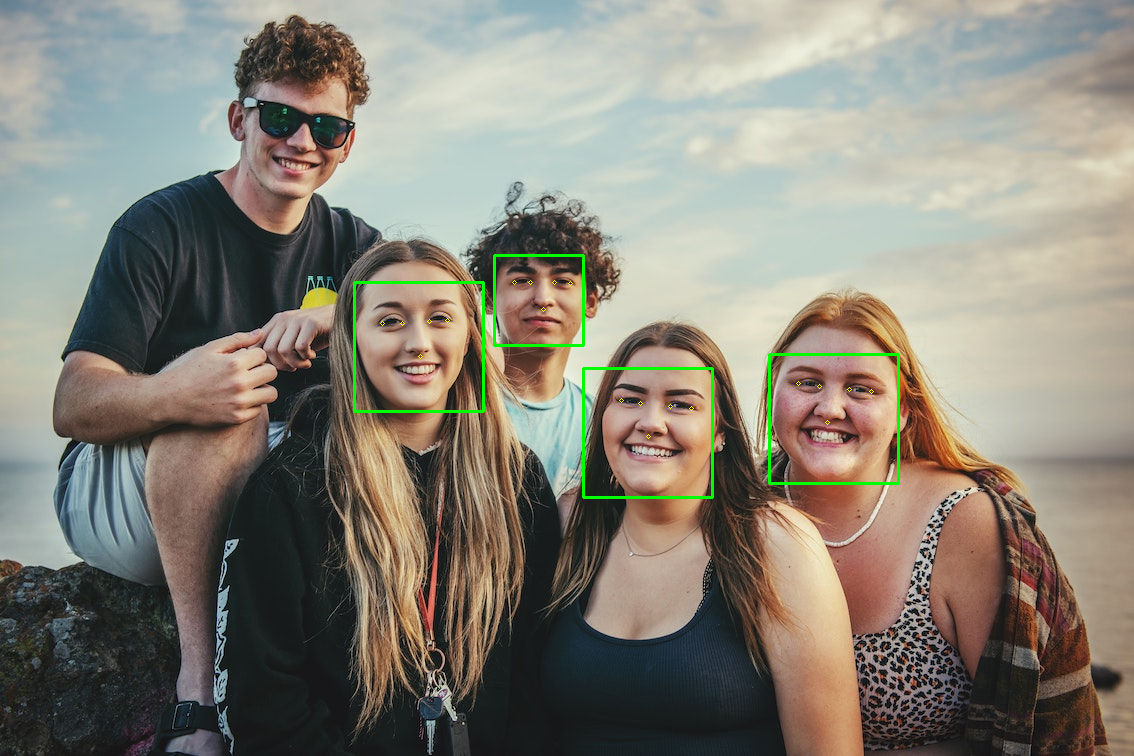

In [ ]:
image = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people.jpg')

face_detections = face_detector(image, 1)

for face_detection in face_detections:
    face_points = points_5_detector(image, face_detection)
    for face_point in face_points.parts():
        cv2.circle(image, (face_point.x, face_point.y), 2, (0, 255, 255))
        left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        
cv2_imshow(image)

## 4. Detect Facial Points (with all train data)

In [ ]:
import os

In [ ]:
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
all_face_descript_vectors = None

for idx, train_image_path in enumerate(all_train_image_paths):
    image = Image.open(train_image_path).convert('RGB')
    image_np = np.array(image, 'uint8')  # convert the image type to a numpy array type (with integer format)

    face_detections = face_detector(image_np, 1)

    for face_detection in face_detections:
        left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
        cv2.rectangle(image_np, (left, top), (right, bottom), (0, 255, 0), 2)  # draw face bounding-boxes

        face_points = points_68_detector(image_np, face_detection)
        for face_point in face_points.parts():
            cv2.circle(image_np, (face_point.x, face_point.y), 2, (0, 255, 255))  # draw facial points circles

        # Delivering face_points returns 128 features that best represent a face.
        # Type of face_descript_vectors is <class 'dlib.vector'>
        # len(face_descriptor) is 128
        face_descript_vectors = face_descriptor_extractor.compute_face_descriptor(image_np, face_points)
        
        face_descript_vectors = [vector for vector in face_descript_vectors]
        face_descript_vectors = np.asarray(face_descript_vectors, dtype=np.float64)  # Change list to array
        # Convert the shape of face_descript_vectors with the original shape (128,) into (1,128)
        face_descript_vectors = face_descript_vectors[np.newaxis, :]  

    if all_face_descript_vectors is None:
        all_face_descript_vectors = face_descript_vectors
    else:
        all_face_descript_vectors = np.concatenate((all_face_descript_vectors, face_descript_vectors), axis=0)

    index[idx] = train_image_path
    cv2_imshow(image_np)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
all_face_descript_vectors.shape

(135, 128)

- There are 135 images, and each image has 128 values (features).

In [ ]:
all_face_descript_vectors

array([[-0.22962049,  0.12019435,  0.04022831, ..., -0.042716  ,
         0.0959124 ,  0.06577493],
       [-0.13795598,  0.06165119,  0.09182883, ...,  0.03930535,
         0.1005903 ,  0.03935796],
       [-0.15160581,  0.04527728, -0.08283859, ...,  0.03166239,
         0.03082913,  0.09865721],
       ...,
       [-0.17561033,  0.12840506,  0.00794933, ...,  0.02513234,
         0.07086781,  0.02624539],
       [-0.22398801,  0.10995013,  0.02904447, ..., -0.03118917,
         0.08276246,  0.07187803],
       [-0.15260774,  0.15905356,  0.07268488, ..., -0.04330073,
         0.16884165,  0.01071469]])

In [ ]:
len(index)

135

In [ ]:
index

{0: '/content/yalefaces/train/subject15.leftlight.gif',
 1: '/content/yalefaces/train/subject10.leftlight.gif',
 2: '/content/yalefaces/train/subject05.happy.gif',
 3: '/content/yalefaces/train/subject08.happy.gif',
 4: '/content/yalefaces/train/subject09.centerlight.gif',
 5: '/content/yalefaces/train/subject07.centerlight.gif',
 6: '/content/yalefaces/train/subject07.surprised.gif',
 7: '/content/yalefaces/train/subject08.wink.gif',
 8: '/content/yalefaces/train/subject09.sleepy.gif',
 9: '/content/yalefaces/train/subject14.centerlight.gif',
 10: '/content/yalefaces/train/subject14.leftlight.gif',
 11: '/content/yalefaces/train/subject03.sleepy.gif',
 12: '/content/yalefaces/train/subject11.sleepy.gif',
 13: '/content/yalefaces/train/subject15.normal.gif',
 14: '/content/yalefaces/train/subject06.rightlight.gif',
 15: '/content/yalefaces/train/subject01.rightlight.gif',
 16: '/content/yalefaces/train/subject04.glasses.gif',
 17: '/content/yalefaces/train/subject05.glasses.gif',
 18: 

## 4. Calculate the Distance Betwwen Faces


In [ ]:
all_face_descript_vectors[0]

array([-0.22962049,  0.12019435,  0.04022831, -0.04577019, -0.0596936 ,
       -0.03445074, -0.00173083, -0.03375447,  0.18426076, -0.07980816,
        0.26726082, -0.08175156, -0.23746383, -0.0879533 , -0.02495056,
        0.18584709, -0.14823411, -0.1320442 , -0.06190133, -0.11770278,
        0.04770283, -0.03227202, -0.06812931,  0.09597022, -0.16889912,
       -0.34810591, -0.06433549, -0.15099685, -0.01418512, -0.13965547,
       -0.1275972 ,  0.00220962, -0.22476092, -0.13469139, -0.03341784,
       -0.02269427,  0.03859973, -0.0201915 ,  0.11333327,  0.00603959,
       -0.12446829,  0.00415057,  0.05674386,  0.28493112,  0.14987382,
        0.08285761, -0.02973976, -0.00602081,  0.06642431, -0.2389565 ,
        0.07155299,  0.08756153,  0.09586179,  0.02780868,  0.03490258,
       -0.12839437, -0.05931669,  0.07616018, -0.19919932,  0.09320292,
        0.05326463, -0.06260969, -0.09205858, -0.06381916,  0.25942552,
        0.16275042, -0.09836106, -0.06751633,  0.21581914, -0.08

In [ ]:
len(all_face_descript_vectors[0])

128

- It refers to 128 feature values representing one face. 
- Faces close to this feature value are the same faces.


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
np.linalg.norm(all_face_descript_vectors[0] - all_face_descript_vectors[0])

0.0

- We calculated the same vector-to-vector distance, so we get 0.0.

In [ ]:
np.linalg.norm(all_face_descript_vectors[0] - all_face_descript_vectors[1])

0.5998141632331389

In [ ]:
# Calculate the distance between the 0th face vector and all other face vectors
np.linalg.norm(all_face_descript_vectors[0] - all_face_descript_vectors[1:], axis=1)

array([0.59981416, 0.61916055, 0.59400943, 0.66175782, 0.59636826,
       0.6197782 , 0.69007047, 0.66910262, 0.69691883, 0.73277476,
       0.60742267, 0.79938071, 0.49925613, 0.67970097, 0.67970097,
       0.69874208, 0.71526753, 0.63929673, 0.60711378, 0.68474134,
       0.68474134, 0.75042443, 0.61758779, 0.62620799, 0.76703756,
       0.781212  , 0.6424547 , 0.63108582, 0.51984352, 0.6257153 ,
       0.58844351, 0.64742701, 0.6288269 , 0.66682624, 0.65101445,
       0.71989764, 0.74023233, 0.67063377, 0.78773483, 0.53999344,
       0.6344628 , 0.71488726, 0.59706252, 0.62073944, 0.74890802,
       0.56931087, 0.60711378, 0.60523775, 0.6618031 , 0.81056522,
       0.80457072, 0.67200127, 0.54280699, 0.64615442, 0.63036962,
       0.54203822, 0.53312042, 0.50425128, 0.66233833, 0.51039376,
       0.54455275, 0.54455275, 0.68543962, 0.65084036, 0.59585717,
       0.67658963, 0.5055014 , 0.63624756, 0.624825  , 0.66123219,
       0.50841738, 0.62187547, 0.66719873, 0.72850373, 0.61476

In [ ]:
np.argmin(np.linalg.norm(all_face_descript_vectors[0] - all_face_descript_vectors[1:], axis=1))

82

In [ ]:
np.linalg.norm(all_face_descript_vectors[0] - all_face_descript_vectors[1:], axis=1)[81]

0.529793327050358

## 5. Detect Faces with Dlib


In [ ]:
test_image_path = '/content/yalefaces/test'

all_test_image_file_name = os.listdir(test_image_path)

all_test_image_paths = [os.path.join(test_image_path, f) for f in all_test_image_file_name]

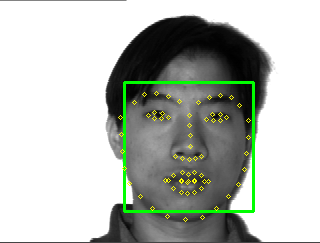

In [ ]:
    if all_face_descript_vectors is None:
        all_face_descript_vectors = face_descript_vectors
    else:
        all_face_descript_vectors = np.concatenate((all_face_descript_vectors, face_descript_vectors), axis=0)

    index[idx] = train_image_path
    cv2_imshow(image_np)

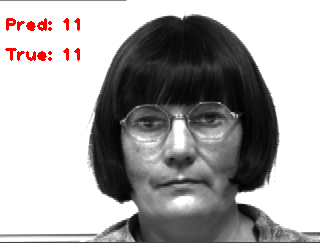

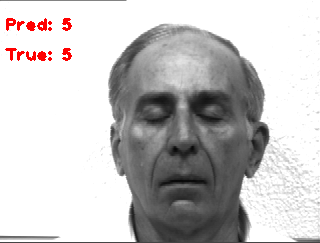

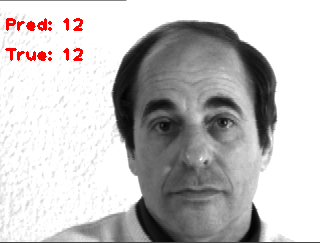

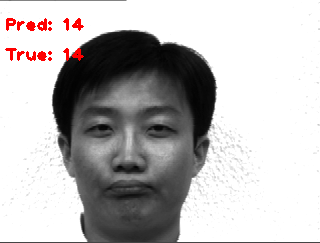

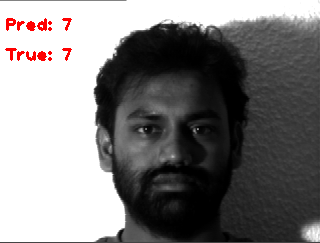

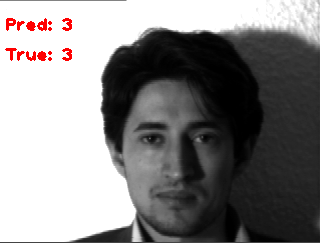

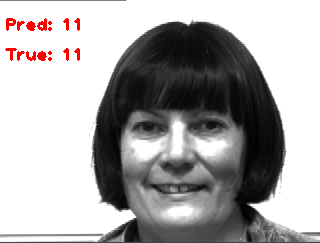

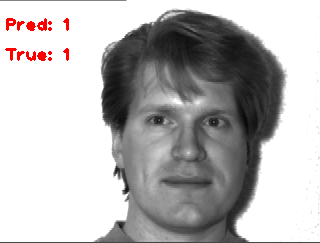

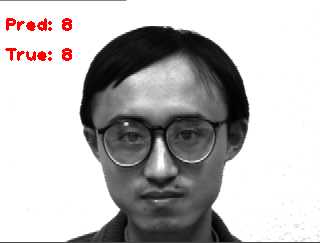

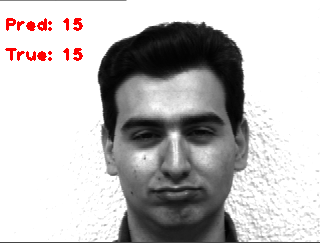

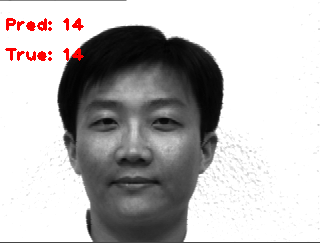

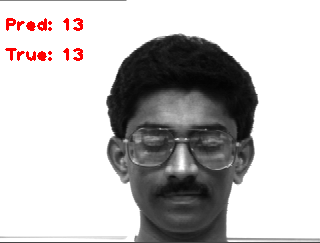

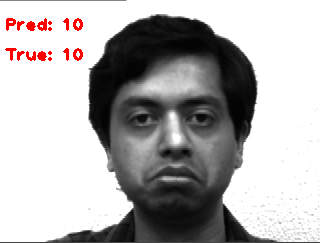

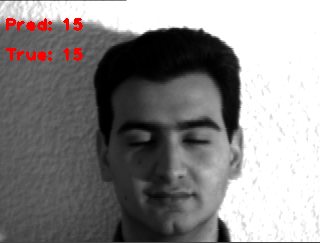

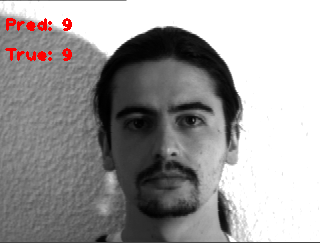

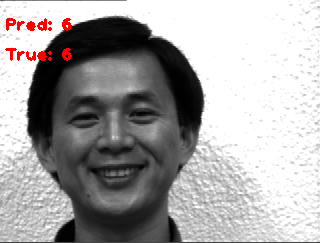

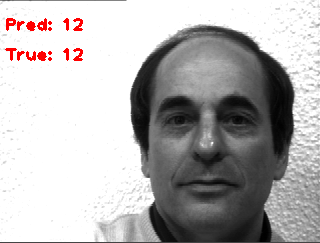

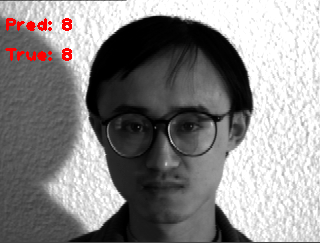

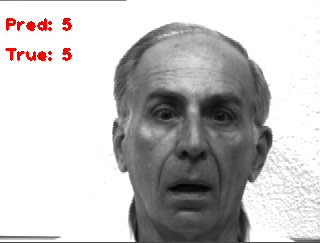

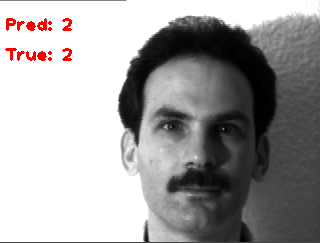

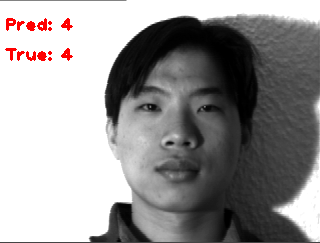

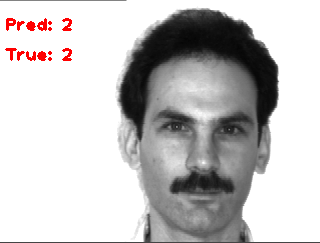

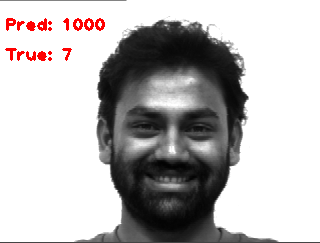

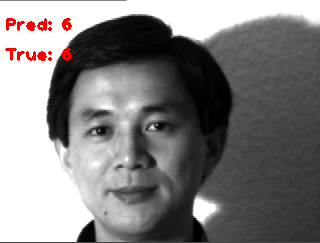

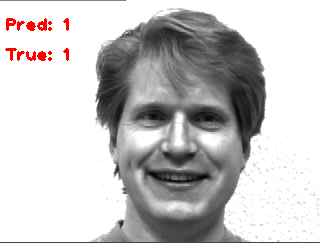

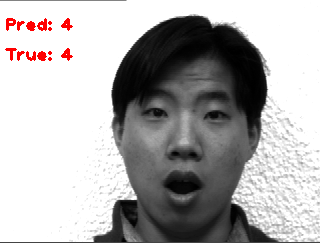

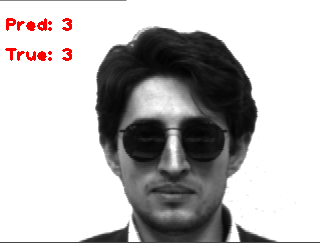

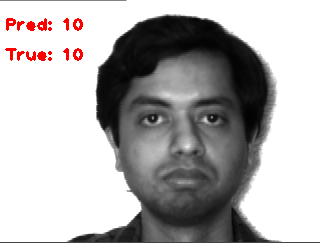

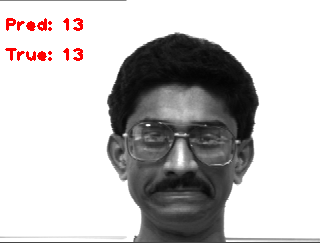

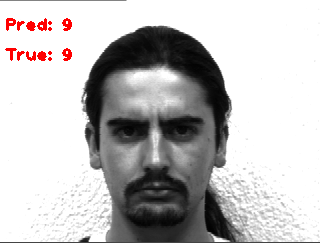

In [ ]:
threshold = 0.5
ids_pred = []
ids_true = []

for test_image_path in all_test_image_paths:
    image = Image.open(test_image_path).convert('RGB')
    image_np = np.array(image, 'uint8')

    face_detections = face_detector(image_np, 1)

    for face_detection in face_detections:
        face_points = points_68_detector(image_np, face_detection)

        face_descript_vectors = face_descriptor_extractor.compute_face_descriptor(image_np, face_points)

        face_descript_vectors = [vector for vector in face_descript_vectors]
        face_descript_vectors = np.asarray(face_descript_vectors, dtype=np.float64)
        face_descript_vectors = face_descript_vectors[np.newaxis, :]

        distances = np.linalg.norm(face_descript_vectors - all_face_descript_vectors, axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= threshold:
            id_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
        else:
            id_pred = 1000

        id_true = int(os.path.split(test_image_path)[1].split('.')[0].replace('subject', ''))

        ids_pred.append(id_pred)
        ids_true.append(id_true)

        cv2.putText(image_np, f'Pred: {str(id_pred)}', (5, 30), cv2.FONT_HERSHEY_PLAIN, 1.1, (0, 0, 255), 2)
        cv2.putText(image_np, f'True: {str(id_true)}', (5, 60), cv2.FONT_HERSHEY_PLAIN, 1.1, (0, 0, 255), 2)

    cv2_imshow(image_np)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ids_pred, ids_true)

0.9666666666666667